# 원본 데이터 가공없이 학습 실행

=== HR 퇴사율 예측 머신러닝 분석 시작 ===
라이브러리 로딩 완료

1. 데이터 로딩...

2. 데이터 기본 정보 확인...
데이터 형태: (100000, 20)
결측치 확인:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

타겟 변수(Resigned) 분포:
Resigned
False    89990
True     10010
Name: count, dtype: int64
퇴사율: 10.0%

3. 데이터 전처리 시작...
- Hire_Date 컬럼 제거 (모든 값이 동일)
- Gender의 'Other' 값 제거
제거 전 데이터 수: 100000
제거 후 데이터 수: 96032
- 범주형 변수 인코딩 진행
  D

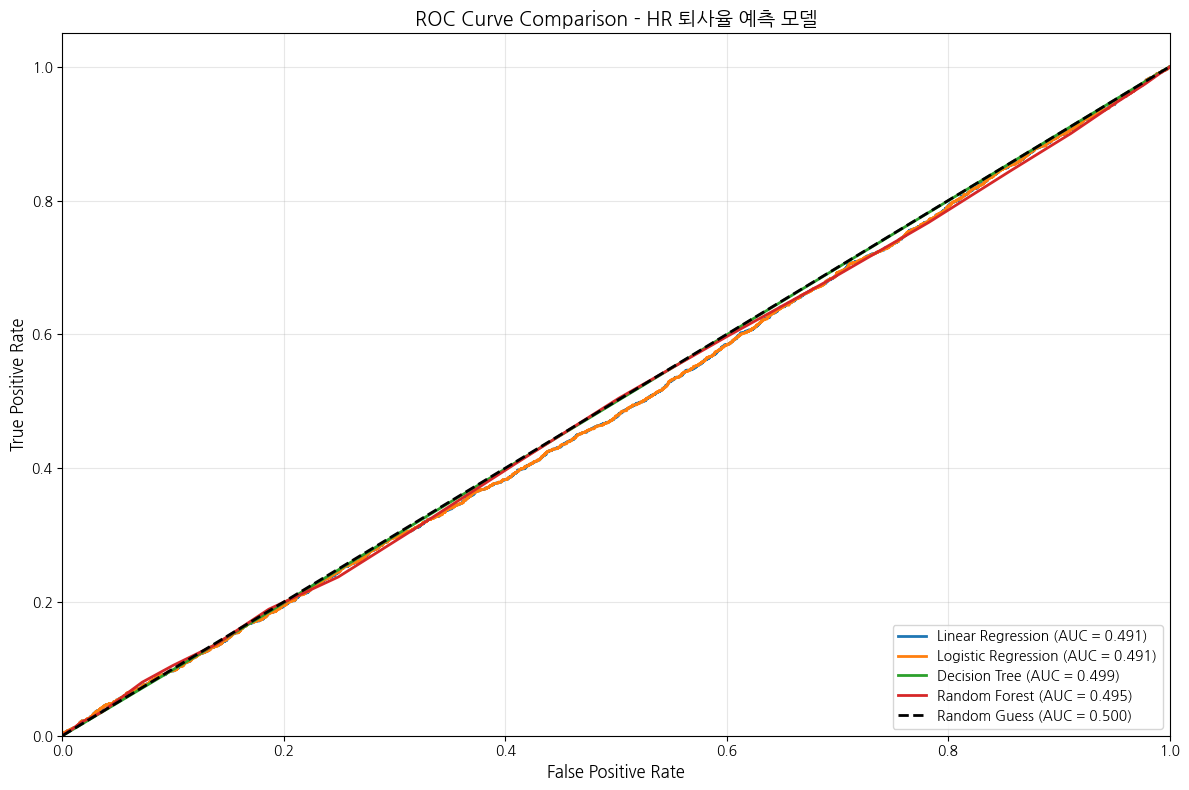


최종 분석 결과 요약
원본 데이터 크기: 100,000개
전처리 후 데이터 크기: 96,032개
훈련 데이터: 76,825개
테스트 데이터: 19,207개

사용된 머신러닝 모델: 4개
1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. Random Forest

ROC AUC 점수 순위:
1. Decision Tree: 0.499
2. Random Forest: 0.495
3. Logistic Regression: 0.491
4. Linear Regression: 0.491

=== HR 퇴사율 예측 머신러닝 분석 완료 ===
분석이 성공적으로 완료되었습니다!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

print("=== HR 퇴사율 예측 머신러닝 분석 시작 ===")
print("라이브러리 로딩 완료")

# =====================================================
# 1. 데이터 로드 (CSV 파일 로드)
# =====================================================

print("\n1. 데이터 로딩...")

df = pd.read_csv('/content/drive/MyDrive/project_2nd/employee.csv')


# =====================================================
# 2. 데이터 기본 정보 확인
# =====================================================

print("\n2. 데이터 기본 정보 확인...")
print(f"데이터 형태: {df.shape}")
print(f"결측치 확인:")
print(df.isnull().sum())

print(f"\n타겟 변수(Resigned) 분포:")
print(df['Resigned'].value_counts())
print(f"퇴사율: {df['Resigned'].sum() / len(df) * 100:.1f}%")

# =====================================================
# 3. 데이터 전처리
# =====================================================

print("\n3. 데이터 전처리 시작...")

# 3-1. Hire_Date 컬럼 제거 (모두 같은 값)
print("- Hire_Date 컬럼 제거 (모든 값이 동일)")
df = df.drop('Hire_Date', axis=1)

# 3-2. Gender의 'Other' 값 제거
print("- Gender의 'Other' 값 제거")
print(f"제거 전 데이터 수: {len(df)}")
df = df[df['Gender'] != 'Other']
print(f"제거 후 데이터 수: {len(df)}")

# 3-3. 범주형 변수 인코딩
print("- 범주형 변수 인코딩 진행")
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"  {col} 인코딩 완료")

print("데이터 전처리 완료")

# =====================================================
# 5. 특성(X)과 타겟(y) 분리
# =====================================================

print("\n5. 특성과 타겟 변수 분리...")

# Employee_ID는 예측에 불필요하므로 제거
X = df.drop(['Employee_ID', 'Resigned'], axis=1)
y = df['Resigned'].astype(int)  # True/False를 1/0으로 변환

print(f"특성 변수 수: {X.shape[1]}")
print(f"특성 변수명: {list(X.columns)}")

# =====================================================
# 6. 훈련/테스트 데이터 분할
# =====================================================

print("\n6. 훈련/테스트 데이터 분할...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 데이터: {X_train.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")

# =====================================================
# 7. 특성 스케일링
# =====================================================

print("\n7. 특성 스케일링...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("스케일링 완료")

# =====================================================
# 8. 머신러닝 모델 학습 및 평가
# =====================================================

print("\n8. 머신러닝 모델 학습 및 평가 시작...")

# 모델 딕셔너리 정의
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    # 'SVM': SVC(random_state=42, probability=True),
    # 'K-NN': KNeighborsClassifier(n_neighbors=5)
}

# 결과 저장용 딕셔너리
model_results = {}
model_predictions = {}
model_probabilities = {}

print("\n각 모델별 학습 및 평가 진행:")
print("="*50)

for name, model in models.items():
    print(f"\n[{name}] 모델 학습 중...")

    # 선형 회귀는 회귀 모델이므로 특별 처리
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred_proba = model.predict(X_test_scaled)
        # 회귀 결과를 0.5 기준으로 이진 분류
        y_pred = (y_pred_proba > 0.5).astype(int)
        y_pred_proba = np.abs(y_pred_proba)  # 확률값으로 변환
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # 확률 예측 (ROC 커브용)
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_pred_proba = model.decision_function(X_test_scaled)
        else:
            y_pred_proba = y_pred

    # 결과 저장
    model_predictions[name] = y_pred
    model_probabilities[name] = y_pred_proba

    # 분류 리포트 출력
    print(f"\n[{name}] 분류 리포트:")
    print(classification_report(y_test, y_pred))

    print(f"[{name}] 학습 완료")

print("\n모든 모델 학습 완료!")

# =====================================================
# 9. ROC 커브 그래프 그리기
# =====================================================

print("\n9. ROC 커브 그래프 생성...")

plt.figure(figsize=(12, 8))

# 각 모델의 ROC 커브 그리기
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, model_probabilities[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

# Random Guess 선 추가
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison - HR 퇴사율 예측 모델', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =====================================================
# 10. 최종 결과 요약
# =====================================================

print("\n" + "="*60)
print("최종 분석 결과 요약")
print("="*60)

print(f"원본 데이터 크기: 100,000개")
print(f"전처리 후 데이터 크기: {len(df):,}개")
print(f"훈련 데이터: {X_train.shape[0]:,}개")
print(f"테스트 데이터: {X_test.shape[0]:,}개")

print(f"\n사용된 머신러닝 모델: {len(models)}개")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

print("\nROC AUC 점수 순위:")
auc_scores = []
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, model_probabilities[name])
    roc_auc = auc(fpr, tpr)
    auc_scores.append((name, roc_auc))

# AUC 점수 기준으로 정렬
auc_scores.sort(key=lambda x: x[1], reverse=True)
for i, (name, score) in enumerate(auc_scores, 1):
    print(f"{i}. {name}: {score:.3f}")

print("\n=== HR 퇴사율 예측 머신러닝 분석 완료 ===")
print("분석이 성공적으로 완료되었습니다!")

# 클래스 불균형 해소
클래스의 불균형을 해소하기 위해 다음과 같은 샘플링 기법을 적용하여 균형을 맞추었다.

Over Sampling: 소수 클래스의 데이터를 다수 클래스의 데이터 수에 맞게 증가시키는 방식으로, 여기선 Resampling을 사용. 퇴사자(Resigned: 1)를 무작위로 복제하여 50,000명으로 증가.
Under Sampling: 다수 클래스의 데이터를 소수 클래스 데이터 수에 맞게 줄이는 방식으로, 여기선 Random Sampling을 사용. 재직자(Resigned: 0) 50,000명 무작위 추출.

=== HR 퇴사율 예측 머신러닝 분석 시작 ===
라이브러리 로딩 완료

1. 데이터 로딩...

2. 데이터 기본 정보 확인...
데이터 형태: (100000, 20)
결측치 확인:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

타겟 변수(Resigned) 분포:
Resigned
False    89990
True     10010
Name: count, dtype: int64
퇴사율: 10.0%

3. 데이터 전처리 시작...
- Hire_Date 컬럼 제거 (모든 값이 동일)
- Gender의 'Other' 값 제거
제거 전 데이터 수: 100000
제거 후 데이터 수: 96032
- 범주형 변수 인코딩 진행
  D

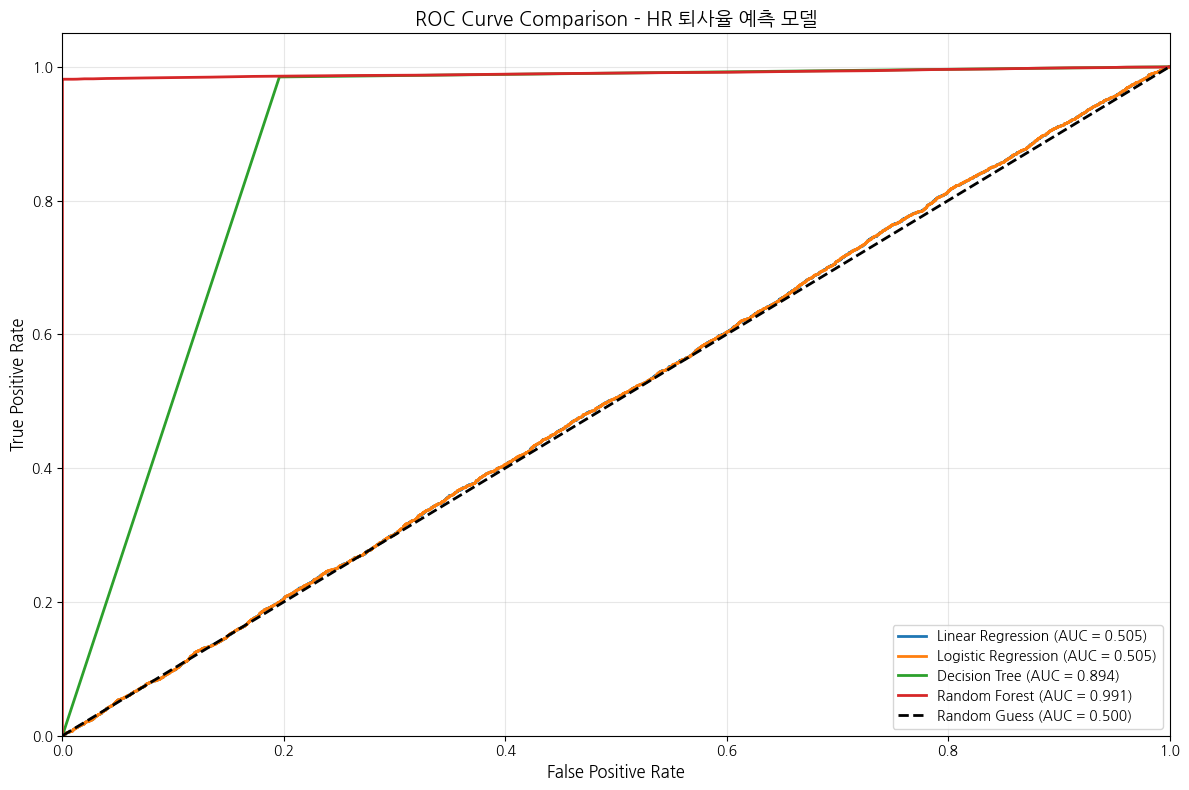


최종 분석 결과 요약
원본 데이터 크기: 100,000개
전처리 후 데이터 크기: 96,032개
균형 조정 후 최종 데이터 크기: 100,000개
훈련 데이터: 80,000개
테스트 데이터: 20,000개

사용된 머신러닝 모델: 4개
1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. Random Forest

ROC AUC 점수 순위:
1. Random Forest: 0.991
2. Decision Tree: 0.894
3. Linear Regression: 0.505
4. Logistic Regression: 0.505

=== HR 퇴사율 예측 머신러닝 분석 완료 ===
분석이 성공적으로 완료되었습니다!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

print("=== HR 퇴사율 예측 머신러닝 분석 시작 ===")
print("라이브러리 로딩 완료")

# =====================================================
# 1. 데이터 로드
# =====================================================

print("\n1. 데이터 로딩...")

df = pd.read_csv('/content/drive/MyDrive/project_2nd/employee.csv')


# =====================================================
# 2. 데이터 기본 정보 확인
# =====================================================

print("\n2. 데이터 기본 정보 확인...")
print(f"데이터 형태: {df.shape}")
print(f"결측치 확인:")
print(df.isnull().sum())

print(f"\n타겟 변수(Resigned) 분포:")
print(df['Resigned'].value_counts())
print(f"퇴사율: {df['Resigned'].sum() / len(df) * 100:.1f}%")

# =====================================================
# 3. 데이터 전처리
# =====================================================

print("\n3. 데이터 전처리 시작...")

# 3-1. Hire_Date 컬럼 제거 (모두 같은 값)
print("- Hire_Date 컬럼 제거 (모든 값이 동일)")
df = df.drop('Hire_Date', axis=1)

# 3-2. Gender의 'Other' 값 제거
print("- Gender의 'Other' 값 제거")
print(f"제거 전 데이터 수: {len(df)}")
df = df[df['Gender'] != 'Other']
print(f"제거 후 데이터 수: {len(df)}")

# 3-3. 범주형 변수 인코딩
print("- 범주형 변수 인코딩 진행")
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"  {col} 인코딩 완료")

print("데이터 전처리 완료")

# =====================================================
# 4. 클래스 불균형 해결을 위한 샘플링
# =====================================================

print("\n4. 클래스 불균형 해결을 위한 샘플링...")

# 퇴사자와 재직자 데이터 분리
resigned_data = df[df['Resigned'] == True]
not_resigned_data = df[df['Resigned'] == False]

print(f"원본 퇴사자 수: {len(resigned_data)}")
print(f"원본 재직자 수: {len(not_resigned_data)}")

# Over Sampling: 퇴사자를 50,000명으로 증가
resigned_oversampled = resample(resigned_data,
                               replace=True,  # 복원 추출
                               n_samples=50000,
                               random_state=42)

# Under Sampling: 재직자를 50,000명으로 감소
not_resigned_undersampled = resample(not_resigned_data,
                                   replace=False,  # 비복원 추출
                                   n_samples=50000,
                                   random_state=42)

# 샘플링된 데이터 결합
balanced_df = pd.concat([resigned_oversampled, not_resigned_undersampled])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)  # 데이터 섞기

print(f"샘플링 후 퇴사자 수: {balanced_df[balanced_df['Resigned'] == True].shape[0]}")
print(f"샘플링 후 재직자 수: {balanced_df[balanced_df['Resigned'] == False].shape[0]}")
print(f"최종 데이터 크기: {balanced_df.shape}")

# =====================================================
# 5. 특성(X)과 타겟(y) 분리
# =====================================================

print("\n5. 특성과 타겟 변수 분리...")

# Employee_ID는 예측에 불필요하므로 제거
X = balanced_df.drop(['Employee_ID', 'Resigned'], axis=1)
y = balanced_df['Resigned'].astype(int)  # True/False를 1/0으로 변환

print(f"특성 변수 수: {X.shape[1]}")
print(f"특성 변수명: {list(X.columns)}")

# =====================================================
# 6. 훈련/테스트 데이터 분할
# =====================================================

print("\n6. 훈련/테스트 데이터 분할...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 데이터: {X_train.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")

# =====================================================
# 7. 특성 스케일링
# =====================================================

print("\n7. 특성 스케일링...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("스케일링 완료")

# =====================================================
# 8. 머신러닝 모델 학습 및 평가
# =====================================================

print("\n8. 머신러닝 모델 학습 및 평가 시작...")

# 모델 딕셔너리 정의
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    # 'SVM': SVC(random_state=42, probability=True),
    # 'K-NN': KNeighborsClassifier(n_neighbors=5)
}

# 결과 저장용 딕셔너리
model_results = {}
model_predictions = {}
model_probabilities = {}

print("\n각 모델별 학습 및 평가 진행:")
print("="*50)

for name, model in models.items():
    print(f"\n[{name}] 모델 학습 중...")

    # 선형 회귀는 회귀 모델이므로 특별 처리
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred_proba = model.predict(X_test_scaled)
        # 회귀 결과를 0.5 기준으로 이진 분류
        y_pred = (y_pred_proba > 0.5).astype(int)
        y_pred_proba = np.abs(y_pred_proba)  # 확률값으로 변환
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # 확률 예측 (ROC 커브용)
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_pred_proba = model.decision_function(X_test_scaled)
        else:
            y_pred_proba = y_pred

    # 결과 저장
    model_predictions[name] = y_pred
    model_probabilities[name] = y_pred_proba

    # 분류 리포트 출력
    print(f"\n[{name}] 분류 리포트:")
    print(classification_report(y_test, y_pred))

    print(f"[{name}] 학습 완료")

print("\n모든 모델 학습 완료!")

# =====================================================
# 9. ROC 커브 그래프 그리기
# =====================================================

print("\n9. ROC 커브 그래프 생성...")

plt.figure(figsize=(12, 8))

# 각 모델의 ROC 커브 그리기
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, model_probabilities[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

# Random Guess 선 추가
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison - HR 퇴사율 예측 모델', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =====================================================
# 10. 최종 결과 요약
# =====================================================

print("\n" + "="*60)
print("최종 분석 결과 요약")
print("="*60)

print(f"원본 데이터 크기: 100,000개")
print(f"전처리 후 데이터 크기: {len(df):,}개")
print(f"균형 조정 후 최종 데이터 크기: {balanced_df.shape[0]:,}개")
print(f"훈련 데이터: {X_train.shape[0]:,}개")
print(f"테스트 데이터: {X_test.shape[0]:,}개")

print(f"\n사용된 머신러닝 모델: {len(models)}개")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

print("\nROC AUC 점수 순위:")
auc_scores = []
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, model_probabilities[name])
    roc_auc = auc(fpr, tpr)
    auc_scores.append((name, roc_auc))

# AUC 점수 기준으로 정렬
auc_scores.sort(key=lambda x: x[1], reverse=True)
for i, (name, score) in enumerate(auc_scores, 1):
    print(f"{i}. {name}: {score:.3f}")

print("\n=== HR 퇴사율 예측 머신러닝 분석 완료 ===")
print("분석이 성공적으로 완료되었습니다!")

# 데이터 노이즈 추가
퇴사와 연관된 5개 항목에 가중치 부여
Work_Hours_Per_Week 10%↑
Projects_Handled 10%↓
Overtime_Hours 10%↑
Training_Hours 10%↓
Employee_Satisfaction_Score 10%↓

=== HR 퇴사율 예측 머신러닝 분석 시작 ===
라이브러리 로딩 완료

1. 데이터 로딩...

2. 데이터 기본 정보 확인...
데이터 형태: (100000, 20)
결측치 확인:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

타겟 변수(Resigned) 분포:
Resigned
False    89990
True     10010
Name: count, dtype: int64
퇴사율: 10.0%

3. 데이터 전처리 시작...
- Hire_Date 컬럼 제거 (모든 값이 동일)
- Gender의 'Other' 값 제거
제거 전 데이터 수: 100000
제거 후 데이터 수: 96032
- 범주형 변수 인코딩 진행
  D

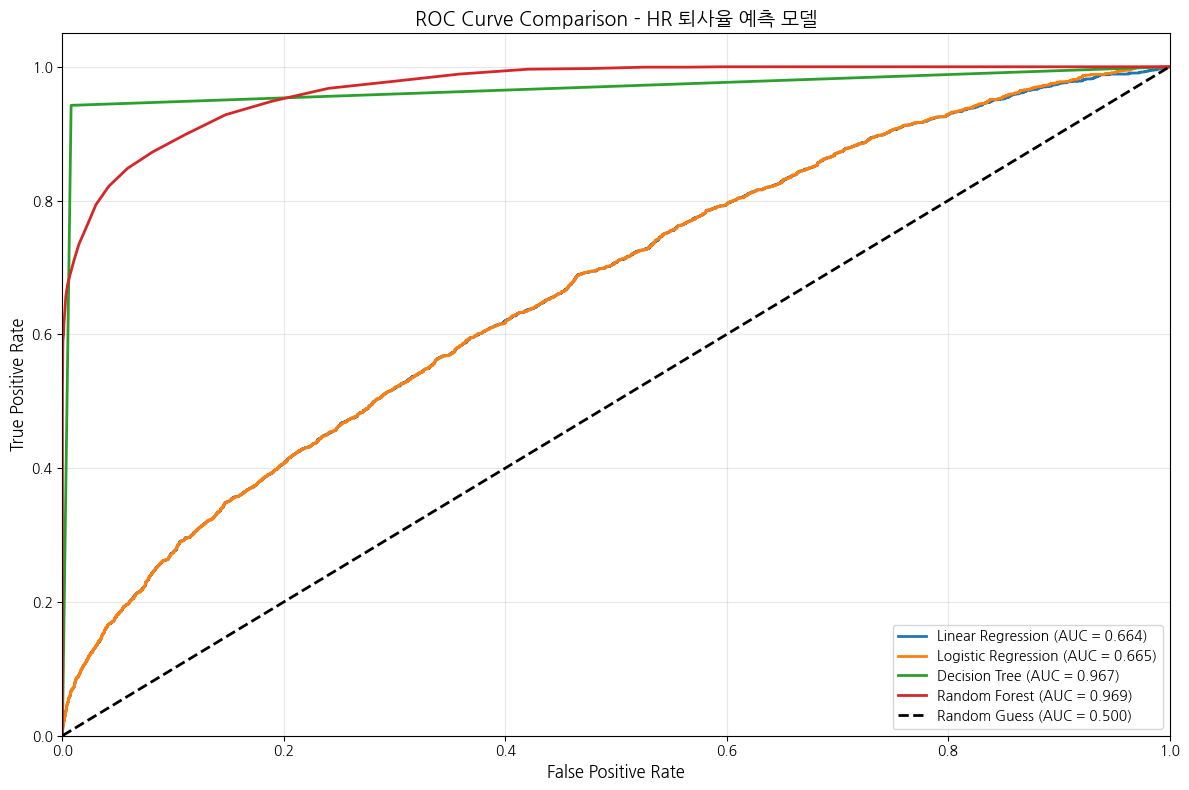


최종 분석 결과 요약
원본 데이터 크기: 100,000개
전처리 후 데이터 크기: 96,032개
최종 데이터 크기: 96,032개
훈련 데이터: 76,825개
테스트 데이터: 19,207개

사용된 머신러닝 모델: 4개
1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. Random Forest

ROC AUC 점수 순위:
1. Random Forest: 0.969
2. Decision Tree: 0.967
3. Logistic Regression: 0.665
4. Linear Regression: 0.664

=== HR 퇴사율 예측 머신러닝 분석 완료 ===
분석이 성공적으로 완료되었습니다!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

print("=== HR 퇴사율 예측 머신러닝 분석 시작 ===")
print("라이브러리 로딩 완료")

# =====================================================
# 1. 데이터 로드 (CSV 파일 로드)
# =====================================================

print("\n1. 데이터 로딩...")

df = pd.read_csv('/content/drive/MyDrive/project_2nd/employee_가중치부여3.csv')


# =====================================================
# 2. 데이터 기본 정보 확인
# =====================================================

print("\n2. 데이터 기본 정보 확인...")
print(f"데이터 형태: {df.shape}")
print(f"결측치 확인:")
print(df.isnull().sum())

print(f"\n타겟 변수(Resigned) 분포:")
print(df['Resigned'].value_counts())
print(f"퇴사율: {df['Resigned'].sum() / len(df) * 100:.1f}%")

# =====================================================
# 3. 데이터 전처리
# =====================================================

print("\n3. 데이터 전처리 시작...")

# 3-1. Hire_Date 컬럼 제거 (모두 같은 값)
print("- Hire_Date 컬럼 제거 (모든 값이 동일)")
df = df.drop('Hire_Date', axis=1)

# 3-2. Gender의 'Other' 값 제거
print("- Gender의 'Other' 값 제거")
print(f"제거 전 데이터 수: {len(df)}")
df = df[df['Gender'] != 'Other']
print(f"제거 후 데이터 수: {len(df)}")

# 3-3. 범주형 변수 인코딩
print("- 범주형 변수 인코딩 진행")
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"  {col} 인코딩 완료")

print("데이터 전처리 완료")

# =====================================================
# 5. 특성(X)과 타겟(y) 분리
# =====================================================

print("\n5. 특성과 타겟 변수 분리...")

# Employee_ID는 예측에 불필요하므로 제거
X = df.drop(['Employee_ID', 'Resigned'], axis=1)
y = df['Resigned'].astype(int)  # True/False를 1/0으로 변환

print(f"특성 변수 수: {X.shape[1]}")
print(f"특성 변수명: {list(X.columns)}")

# =====================================================
# 6. 훈련/테스트 데이터 분할
# =====================================================

print("\n6. 훈련/테스트 데이터 분할...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 데이터: {X_train.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")

# =====================================================
# 7. 특성 스케일링
# =====================================================

print("\n7. 특성 스케일링...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("스케일링 완료")

# =====================================================
# 8. 머신러닝 모델 학습 및 평가
# =====================================================

print("\n8. 머신러닝 모델 학습 및 평가 시작...")

# 모델 딕셔너리 정의
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    # 'SVM': SVC(random_state=42, probability=True),
    # 'K-NN': KNeighborsClassifier(n_neighbors=5)
}

# 결과 저장용 딕셔너리
model_results = {}
model_predictions = {}
model_probabilities = {}

print("\n각 모델별 학습 및 평가 진행:")
print("="*50)

for name, model in models.items():
    print(f"\n[{name}] 모델 학습 중...")

    # 선형 회귀는 회귀 모델이므로 특별 처리
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred_proba = model.predict(X_test_scaled)
        # 회귀 결과를 0.5 기준으로 이진 분류
        y_pred = (y_pred_proba > 0.5).astype(int)
        y_pred_proba = np.abs(y_pred_proba)  # 확률값으로 변환
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # 확률 예측 (ROC 커브용)
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_pred_proba = model.decision_function(X_test_scaled)
        else:
            y_pred_proba = y_pred

    # 결과 저장
    model_predictions[name] = y_pred
    model_probabilities[name] = y_pred_proba

    # 분류 리포트 출력
    print(f"\n[{name}] 분류 리포트:")
    print(classification_report(y_test, y_pred))

    print(f"[{name}] 학습 완료")

print("\n모든 모델 학습 완료!")

# =====================================================
# 9. ROC 커브 그래프 그리기
# =====================================================

print("\n9. ROC 커브 그래프 생성...")

plt.figure(figsize=(12, 8))

# 각 모델의 ROC 커브 그리기
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, model_probabilities[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

# Random Guess 선 추가
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison - HR 퇴사율 예측 모델', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =====================================================
# 10. 최종 결과 요약
# =====================================================

print("\n" + "="*60)
print("최종 분석 결과 요약")
print("="*60)

print(f"원본 데이터 크기: 100,000개")
print(f"전처리 후 데이터 크기: {len(df):,}개")
print(f"최종 데이터 크기: {df.shape[0]:,}개")
print(f"훈련 데이터: {X_train.shape[0]:,}개")
print(f"테스트 데이터: {X_test.shape[0]:,}개")

print(f"\n사용된 머신러닝 모델: {len(models)}개")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

print("\nROC AUC 점수 순위:")
auc_scores = []
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, model_probabilities[name])
    roc_auc = auc(fpr, tpr)
    auc_scores.append((name, roc_auc))

# AUC 점수 기준으로 정렬
auc_scores.sort(key=lambda x: x[1], reverse=True)
for i, (name, score) in enumerate(auc_scores, 1):
    print(f"{i}. {name}: {score:.3f}")

print("\n=== HR 퇴사율 예측 머신러닝 분석 완료 ===")
print("분석이 성공적으로 완료되었습니다!")

=== HR 퇴사율 예측 머신러닝 분석 시작 ===
라이브러리 로딩 완료

1. 데이터 로딩...

2. 데이터 기본 정보 확인...
데이터 형태: (100000, 20)
결측치 확인:
Employee_ID                    0
Department                     0
Gender                         0
Age                            0
Job_Title                      0
Hire_Date                      0
Years_At_Company               0
Education_Level                0
Performance_Score              0
Monthly_Salary                 0
Work_Hours_Per_Week            0
Projects_Handled               0
Overtime_Hours                 0
Sick_Days                      0
Remote_Work_Frequency          0
Team_Size                      0
Training_Hours                 0
Promotions                     0
Employee_Satisfaction_Score    0
Resigned                       0
dtype: int64

타겟 변수(Resigned) 분포:
Resigned
False    89990
True     10010
Name: count, dtype: int64
퇴사율: 10.0%

3. 데이터 전처리 시작...
- Hire_Date 컬럼 제거 (모든 값이 동일)
- Gender의 'Other' 값 제거
제거 전 데이터 수: 100000
제거 후 데이터 수: 96032
- 범주형 변수 인코딩 진행
  D

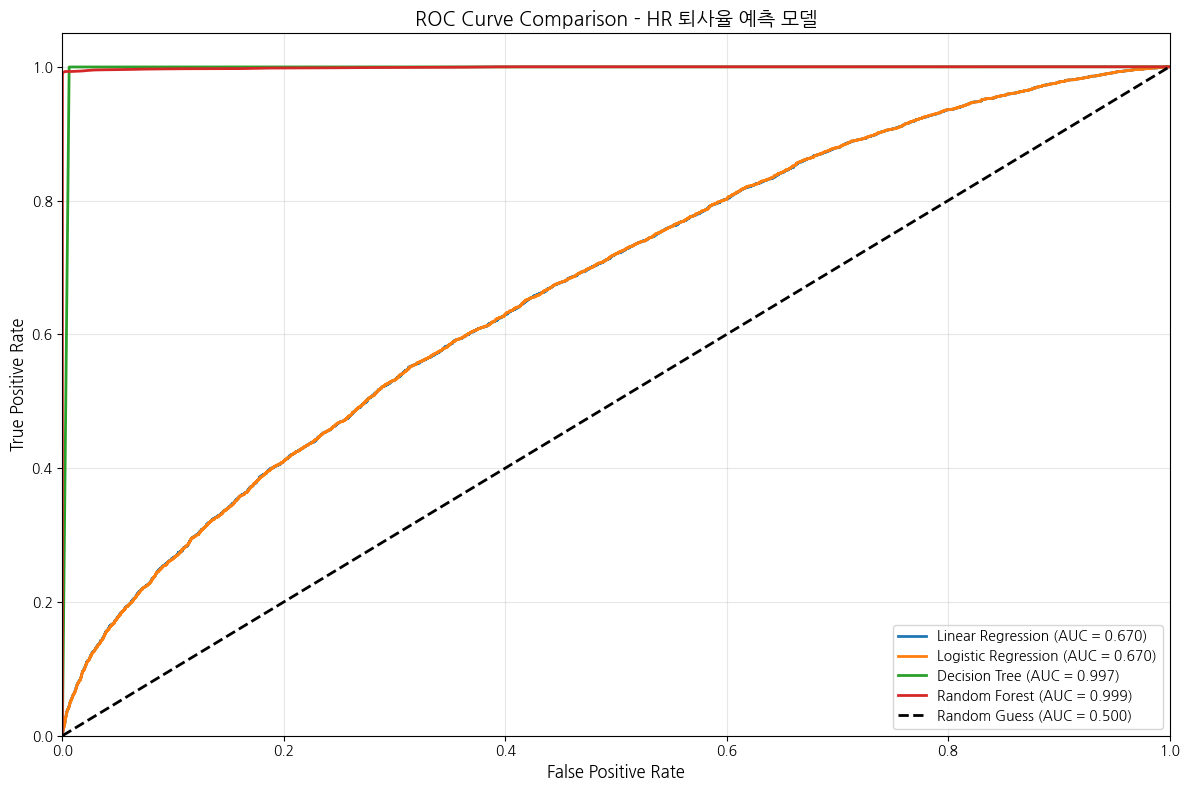


최종 분석 결과 요약
원본 데이터 크기: 100,000개
전처리 후 데이터 크기: 96,032개
균형 조정 후 최종 데이터 크기: 100,000개
훈련 데이터: 80,000개
테스트 데이터: 20,000개

사용된 머신러닝 모델: 4개
1. Linear Regression
2. Logistic Regression
3. Decision Tree
4. Random Forest

ROC AUC 점수 순위:
1. Random Forest: 0.999
2. Decision Tree: 0.997
3. Logistic Regression: 0.670
4. Linear Regression: 0.670

=== HR 퇴사율 예측 머신러닝 분석 완료 ===
분석이 성공적으로 완료되었습니다!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
from sklearn.utils import resample
import warnings
warnings.filterwarnings('ignore')

print("=== HR 퇴사율 예측 머신러닝 분석 시작 ===")
print("라이브러리 로딩 완료")

# =====================================================
# 1. 데이터 로드 (CSV 파일 로드)
# =====================================================

print("\n1. 데이터 로딩...")

df = pd.read_csv('/content/drive/MyDrive/project_2nd/employee_가중치부여3.csv')


# =====================================================
# 2. 데이터 기본 정보 확인
# =====================================================

print("\n2. 데이터 기본 정보 확인...")
print(f"데이터 형태: {df.shape}")
print(f"결측치 확인:")
print(df.isnull().sum())

print(f"\n타겟 변수(Resigned) 분포:")
print(df['Resigned'].value_counts())
print(f"퇴사율: {df['Resigned'].sum() / len(df) * 100:.1f}%")

# =====================================================
# 3. 데이터 전처리
# =====================================================

print("\n3. 데이터 전처리 시작...")

# 3-1. Hire_Date 컬럼 제거 (모두 같은 값)
print("- Hire_Date 컬럼 제거 (모든 값이 동일)")
df = df.drop('Hire_Date', axis=1)

# 3-2. Gender의 'Other' 값 제거
print("- Gender의 'Other' 값 제거")
print(f"제거 전 데이터 수: {len(df)}")
df = df[df['Gender'] != 'Other']
print(f"제거 후 데이터 수: {len(df)}")

# 3-3. 범주형 변수 인코딩
print("- 범주형 변수 인코딩 진행")
categorical_columns = ['Department', 'Gender', 'Job_Title', 'Education_Level']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
    print(f"  {col} 인코딩 완료")

print("데이터 전처리 완료")

# =====================================================
# 4. 클래스 불균형 해결을 위한 샘플링
# =====================================================

print("\n4. 클래스 불균형 해결을 위한 샘플링...")

# 퇴사자와 재직자 데이터 분리
resigned_data = df[df['Resigned'] == True]
not_resigned_data = df[df['Resigned'] == False]

print(f"원본 퇴사자 수: {len(resigned_data)}")
print(f"원본 재직자 수: {len(not_resigned_data)}")

# Over Sampling: 퇴사자를 50,000명으로 증가
resigned_oversampled = resample(resigned_data,
                               replace=True,  # 복원 추출
                               n_samples=50000,
                               random_state=42)

# Under Sampling: 재직자를 50,000명으로 감소
not_resigned_undersampled = resample(not_resigned_data,
                                   replace=False,  # 비복원 추출
                                   n_samples=50000,
                                   random_state=42)

# 샘플링된 데이터 결합
balanced_df = pd.concat([resigned_oversampled, not_resigned_undersampled])
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)  # 데이터 섞기

print(f"샘플링 후 퇴사자 수: {balanced_df[balanced_df['Resigned'] == True].shape[0]}")
print(f"샘플링 후 재직자 수: {balanced_df[balanced_df['Resigned'] == False].shape[0]}")
print(f"최종 데이터 크기: {balanced_df.shape}")

# =====================================================
# 5. 특성(X)과 타겟(y) 분리
# =====================================================

print("\n5. 특성과 타겟 변수 분리...")

# Employee_ID는 예측에 불필요하므로 제거
X = balanced_df.drop(['Employee_ID', 'Resigned'], axis=1)
y = balanced_df['Resigned'].astype(int)  # True/False를 1/0으로 변환

print(f"특성 변수 수: {X.shape[1]}")
print(f"특성 변수명: {list(X.columns)}")

# =====================================================
# 6. 훈련/테스트 데이터 분할
# =====================================================

print("\n6. 훈련/테스트 데이터 분할...")

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"훈련 데이터: {X_train.shape[0]}개")
print(f"테스트 데이터: {X_test.shape[0]}개")

# =====================================================
# 7. 특성 스케일링
# =====================================================

print("\n7. 특성 스케일링...")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("스케일링 완료")

# =====================================================
# 8. 머신러닝 모델 학습 및 평가
# =====================================================

print("\n8. 머신러닝 모델 학습 및 평가 시작...")

# 모델 딕셔너리 정의
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100),
    # 'SVM': SVC(random_state=42, probability=True),
    # 'K-NN': KNeighborsClassifier(n_neighbors=5)
}

# 결과 저장용 딕셔너리
model_results = {}
model_predictions = {}
model_probabilities = {}

print("\n각 모델별 학습 및 평가 진행:")
print("="*50)

for name, model in models.items():
    print(f"\n[{name}] 모델 학습 중...")

    # 선형 회귀는 회귀 모델이므로 특별 처리
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred_proba = model.predict(X_test_scaled)
        # 회귀 결과를 0.5 기준으로 이진 분류
        y_pred = (y_pred_proba > 0.5).astype(int)
        y_pred_proba = np.abs(y_pred_proba)  # 확률값으로 변환
    else:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)

        # 확률 예측 (ROC 커브용)
        if hasattr(model, 'predict_proba'):
            y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        elif hasattr(model, 'decision_function'):
            y_pred_proba = model.decision_function(X_test_scaled)
        else:
            y_pred_proba = y_pred

    # 결과 저장
    model_predictions[name] = y_pred
    model_probabilities[name] = y_pred_proba

    # 분류 리포트 출력
    print(f"\n[{name}] 분류 리포트:")
    print(classification_report(y_test, y_pred))

    print(f"[{name}] 학습 완료")

print("\n모든 모델 학습 완료!")

# =====================================================
# 9. ROC 커브 그래프 그리기
# =====================================================

print("\n9. ROC 커브 그래프 생성...")

plt.figure(figsize=(12, 8))

# 각 모델의 ROC 커브 그리기
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, model_probabilities[name])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})', linewidth=2)

# Random Guess 선 추가
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.500)', linewidth=2)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curve Comparison - HR 퇴사율 예측 모델', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# =====================================================
# 10. 최종 결과 요약
# =====================================================

print("\n" + "="*60)
print("최종 분석 결과 요약")
print("="*60)

print(f"원본 데이터 크기: 100,000개")
print(f"전처리 후 데이터 크기: {len(df):,}개")
print(f"균형 조정 후 최종 데이터 크기: {balanced_df.shape[0]:,}개")
print(f"훈련 데이터: {X_train.shape[0]:,}개")
print(f"테스트 데이터: {X_test.shape[0]:,}개")

print(f"\n사용된 머신러닝 모델: {len(models)}개")
for i, name in enumerate(models.keys(), 1):
    print(f"{i}. {name}")

print("\nROC AUC 점수 순위:")
auc_scores = []
for name in models.keys():
    fpr, tpr, _ = roc_curve(y_test, model_probabilities[name])
    roc_auc = auc(fpr, tpr)
    auc_scores.append((name, roc_auc))

# AUC 점수 기준으로 정렬
auc_scores.sort(key=lambda x: x[1], reverse=True)
for i, (name, score) in enumerate(auc_scores, 1):
    print(f"{i}. {name}: {score:.3f}")

print("\n=== HR 퇴사율 예측 머신러닝 분석 완료 ===")
print("분석이 성공적으로 완료되었습니다!")